In [21]:
library(ggplot2)
library(ggthemes)
library(corrplot)
library(umap)
library(RColorBrewer)

In [3]:
weights_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_weights.csv"
weights = read.csv(weights_filename, row.names = 1)
colnames(weights) = paste0("MOFA",1:20)
head(weights)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HES4,-1.1989501,-0.606049496,-0.57734171,-0.71688760,-0.53329179,0.2955796,0.24943212,0.16363017,0.25442816,-0.15633491,0.08771356,-0.166739590,0.06892244,0.1615256294,-0.1022589954,-0.23343917,-0.050598826,0.07421634,-0.02027675,-0.032060071
CHD5,-1.0323199,0.007728008,-0.13724390,-0.15003112,0.20892100,0.2646135,0.03279889,-0.15273501,0.29409552,-0.06216265,0.12637782,-0.003141197,0.22686901,0.0884313507,0.0860417026,0.11995625,-0.035347734,0.07623051,0.09673210,0.003000383
ACOT7,-1.1731706,-0.559427451,-0.05522287,0.20251814,-0.36598156,0.2965204,-0.03088592,-0.10432686,-0.11528162,-0.22992004,-0.27992944,-0.052675703,-0.04034805,0.0523739851,0.0711498078,0.04845310,0.049514301,-0.08319519,-0.13374392,0.018522163
UTS2,-1.2182314,0.348607595,0.04788651,-0.17659157,0.02053964,-0.4976839,0.46628145,0.03266932,0.01372975,0.50738456,-0.02002021,0.451064910,-0.06107053,0.1862427955,0.1649189463,0.27944837,0.076698026,-0.07084088,-0.01014295,0.192439844
ENO1,-1.0558830,0.258638612,-0.10643891,0.01003899,-0.28350979,0.1349899,-0.01722538,-0.04640726,-0.03483620,-0.24687520,-0.18486048,0.128132962,-0.09510169,-0.0545545261,-0.0007439852,-0.06284875,0.003176325,0.09219709,-0.21268319,-0.115481766
SRM,-0.5414874,-0.492902748,-0.87243656,-0.22825178,-0.76522899,-0.1681531,-0.49203327,0.10414095,0.21825586,0.11083616,0.18738947,-0.168366072,-0.38068892,0.0009024366,0.1230244657,-0.07822947,0.375346126,0.06126986,-0.13921175,0.023691497


In [4]:
library(ComplexHeatmap)
library(circlize)

Loading required package: grid
ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.9
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



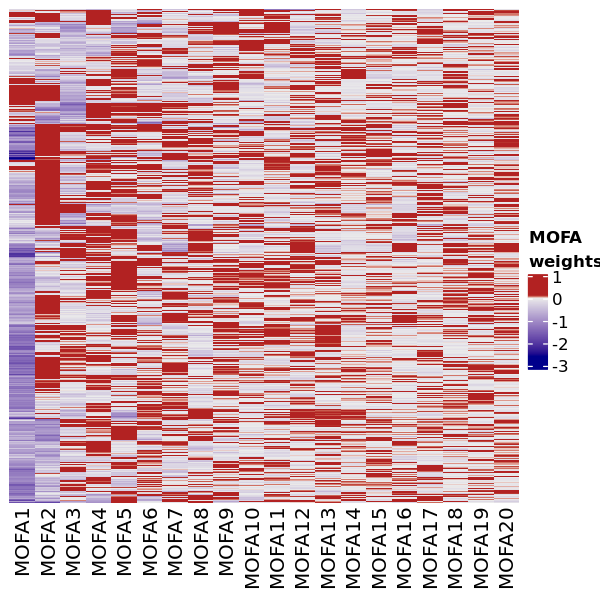

In [5]:
options(repr.plot.width = 5, repr.plot.height = 5)
matnum = as.matrix(weights)
Heatmap(matnum, cluster_rows = T, cluster_columns = F, show_row_dend = F, show_column_dend = F,
        show_column_names = T, show_row_names = F, name = "MOFA \nweights",     
        col = colorRamp2(c(min(matnum), 0,max(matnum)-2), c("darkblue", "grey92","firebrick")))

In [6]:
file2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_logcounts_model_factors.csv"

In [7]:
df = read.csv(file2, row.names = 1)
head(df)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.6664557,0.589291718,-1.2180321,0.5332707,-0.11471842,-0.70044968,-0.8720116,-0.7222332,0.1454206,0.25517320,-0.15370322,0.04656182,0.93356092,-0.30333289,-1.42060705,0.3760455,-1.375034636,-1.321022478,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.7932753,-1.089708277,0.5161943,0.3031652,-0.37070591,-0.63629753,1.1359303,0.2466621,-0.3232387,-0.32895030,0.29749804,0.10648809,1.43480155,0.17350133,1.14906137,-0.5206075,0.887737582,-0.130147039,0.94184241,0.6611521
HPSI0714i-iudw_1--DA--d30--2,1.4601733,-0.920466384,0.4333725,0.8382845,0.04179157,-0.34931222,-0.5665099,0.0331838,-0.2947486,1.64709869,-0.24431455,1.19358563,0.23443004,1.36761039,-1.35462397,-0.4356618,-0.001933761,0.004343457,-0.10995757,-0.0299945
HPSI0714i-iudw_1--DA--d30--3,2.1352168,0.007667889,-0.3406776,0.1694220,-0.48726664,-0.94746164,0.2343832,-0.4423545,0.5563007,0.43464525,0.03194636,0.58178461,0.67307489,0.18879474,-1.24651969,1.0372639,-0.689319483,-0.844009905,1.14812243,0.3715339
HPSI0714i-iudw_1--DA--d30--4,-0.2996176,-1.471800929,-0.5598412,-0.2879682,-0.07147503,-0.09441242,-0.9727544,0.5814618,-1.2320759,-0.33422713,-0.41475364,1.17859668,0.02182522,-0.07057997,-0.08639611,0.6566855,0.007250073,-0.023220657,-1.76654655,-1.0820929
HPSI0714i-iudw_1--DA--d30--5,0.2949934,-1.601036803,0.1386558,0.3616551,0.16234537,0.01715240,-1.1952241,0.6175316,-0.7246064,0.02455041,0.15996241,0.56980108,0.53407917,0.10825273,-0.21115001,-0.7207979,-0.929239594,-0.583794032,-0.50870368,-0.7649116


In [8]:
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/DA_phenotype_wo_outliers2_sce.rds")
sce

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    

class: SingleCellExperiment 
dim: 32738 9219 
metadata(0):
assays(2): counts logcounts
rownames(32738): MIR1302.10 FAM138A ... AC002321.2 AC002321.1
rowData names(0):
colnames(9219): HPSI0714i-iudw_1--DA--d30--0
  HPSI0714i-iudw_1--DA--d30--1 ... HPSI0114i-rozh_4--DA--d52_tr--11
  HPSI0114i-rozh_4--DA--d52_tr--12
colData names(5): pseudocell celltype donor cluster condition
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [9]:
rownames(df) = colnames(sce)
head(df)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.6664557,0.589291718,-1.2180321,0.5332707,-0.11471842,-0.70044968,-0.8720116,-0.7222332,0.1454206,0.25517320,-0.15370322,0.04656182,0.93356092,-0.30333289,-1.42060705,0.3760455,-1.375034636,-1.321022478,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.7932753,-1.089708277,0.5161943,0.3031652,-0.37070591,-0.63629753,1.1359303,0.2466621,-0.3232387,-0.32895030,0.29749804,0.10648809,1.43480155,0.17350133,1.14906137,-0.5206075,0.887737582,-0.130147039,0.94184241,0.6611521
HPSI0714i-iudw_1--DA--d30--2,1.4601733,-0.920466384,0.4333725,0.8382845,0.04179157,-0.34931222,-0.5665099,0.0331838,-0.2947486,1.64709869,-0.24431455,1.19358563,0.23443004,1.36761039,-1.35462397,-0.4356618,-0.001933761,0.004343457,-0.10995757,-0.0299945
HPSI0714i-iudw_1--DA--d30--3,2.1352168,0.007667889,-0.3406776,0.1694220,-0.48726664,-0.94746164,0.2343832,-0.4423545,0.5563007,0.43464525,0.03194636,0.58178461,0.67307489,0.18879474,-1.24651969,1.0372639,-0.689319483,-0.844009905,1.14812243,0.3715339
HPSI0714i-iudw_1--DA--d30--4,-0.2996176,-1.471800929,-0.5598412,-0.2879682,-0.07147503,-0.09441242,-0.9727544,0.5814618,-1.2320759,-0.33422713,-0.41475364,1.17859668,0.02182522,-0.07057997,-0.08639611,0.6566855,0.007250073,-0.023220657,-1.76654655,-1.0820929
HPSI0714i-iudw_1--DA--d30--5,0.2949934,-1.601036803,0.1386558,0.3616551,0.16234537,0.01715240,-1.1952241,0.6175316,-0.7246064,0.02455041,0.15996241,0.56980108,0.53407917,0.10825273,-0.21115001,-0.7207979,-0.929239594,-0.583794032,-0.50870368,-0.7649116


In [10]:
colnames(df) = paste0("MOFA",1:20)

In [11]:
nrow(df)
ncol(df)

[1] 9219

[1] 20

In [12]:
head(df)

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
HPSI0714i-iudw_1--DA--d30--0,1.6664557,0.589291718,-1.2180321,0.5332707,-0.11471842,-0.70044968,-0.8720116,-0.7222332,0.1454206,0.25517320,-0.15370322,0.04656182,0.93356092,-0.30333289,-1.42060705,0.3760455,-1.375034636,-1.321022478,0.03628515,-0.5237842
HPSI0714i-iudw_1--DA--d30--1,1.7932753,-1.089708277,0.5161943,0.3031652,-0.37070591,-0.63629753,1.1359303,0.2466621,-0.3232387,-0.32895030,0.29749804,0.10648809,1.43480155,0.17350133,1.14906137,-0.5206075,0.887737582,-0.130147039,0.94184241,0.6611521
HPSI0714i-iudw_1--DA--d30--2,1.4601733,-0.920466384,0.4333725,0.8382845,0.04179157,-0.34931222,-0.5665099,0.0331838,-0.2947486,1.64709869,-0.24431455,1.19358563,0.23443004,1.36761039,-1.35462397,-0.4356618,-0.001933761,0.004343457,-0.10995757,-0.0299945
HPSI0714i-iudw_1--DA--d30--3,2.1352168,0.007667889,-0.3406776,0.1694220,-0.48726664,-0.94746164,0.2343832,-0.4423545,0.5563007,0.43464525,0.03194636,0.58178461,0.67307489,0.18879474,-1.24651969,1.0372639,-0.689319483,-0.844009905,1.14812243,0.3715339
HPSI0714i-iudw_1--DA--d30--4,-0.2996176,-1.471800929,-0.5598412,-0.2879682,-0.07147503,-0.09441242,-0.9727544,0.5814618,-1.2320759,-0.33422713,-0.41475364,1.17859668,0.02182522,-0.07057997,-0.08639611,0.6566855,0.007250073,-0.023220657,-1.76654655,-1.0820929
HPSI0714i-iudw_1--DA--d30--5,0.2949934,-1.601036803,0.1386558,0.3616551,0.16234537,0.01715240,-1.1952241,0.6175316,-0.7246064,0.02455041,0.15996241,0.56980108,0.53407917,0.10825273,-0.21115001,-0.7207979,-0.929239594,-0.583794032,-0.50870368,-0.7649116


In [13]:
write.csv(df, file2)

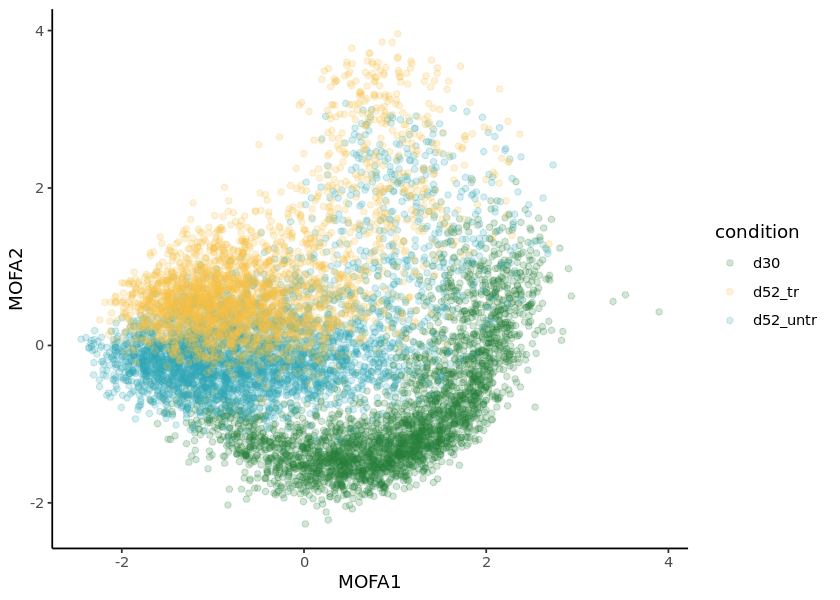

In [19]:
options(repr.plot.width = 7, repr.plot.height = 5)
df$condition = sce$condition
ggplot(df, aes(x = MOFA1, y = MOFA2, colour = condition)) + geom_point(alpha = 0.2) + theme_classic() + 
    scale_color_canva(palette = "Cheerful brights")

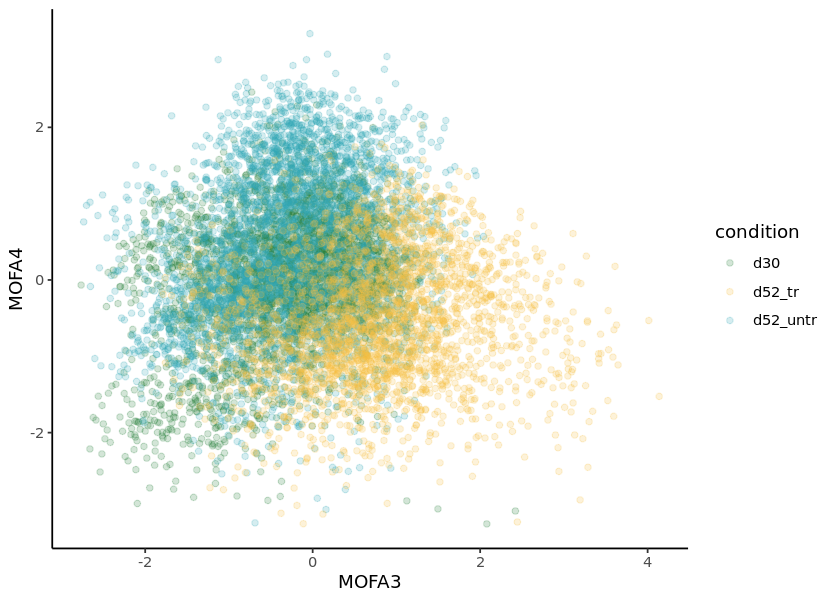

In [40]:
ggplot(df, aes(x = MOFA3, y = MOFA4, colour = condition)) + geom_point(alpha = 0.2) + theme_classic() + 
    scale_color_canva(palette = "Cheerful brights")

In [27]:
cyclin.genes <- rownames(sce)[grep("^CCN[ABDE][0-9]$", rownames(sce))]
cyclin.genes

[1] "CCNA2" "CCNB1" "CCND3" "CCNB3" "CCNE2" "CCND1" "CCND2" "CCNA1" "CCNB2"
[10] "CCNE1"

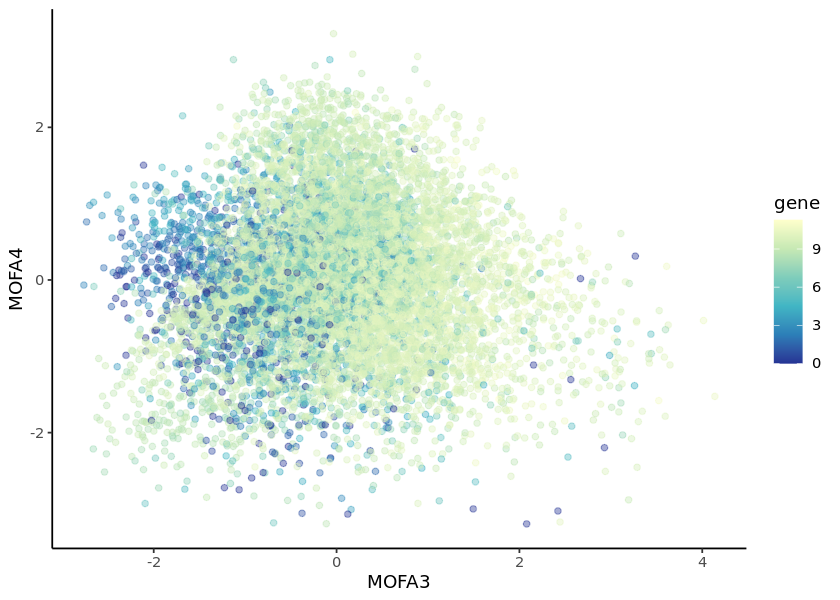

In [38]:
gene = 'NSG2'
df$gene = logcounts(sce)[gene,]
ggplot(df, aes(x = MOFA3, y = MOFA4, colour = gene)) + geom_point(alpha = 0.4) + theme_classic() + scale_colour_gradientn(colors = rev(brewer.pal(6,"YlGnBu")))

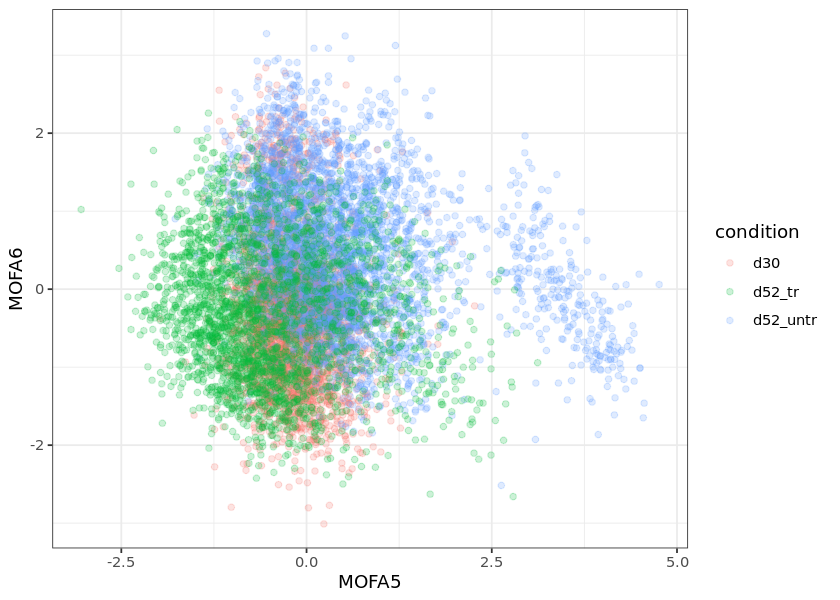

In [16]:
ggplot(df, aes(x = MOFA5, y = MOFA6, colour = condition)) + geom_point(alpha = 0.2) + theme_bw()

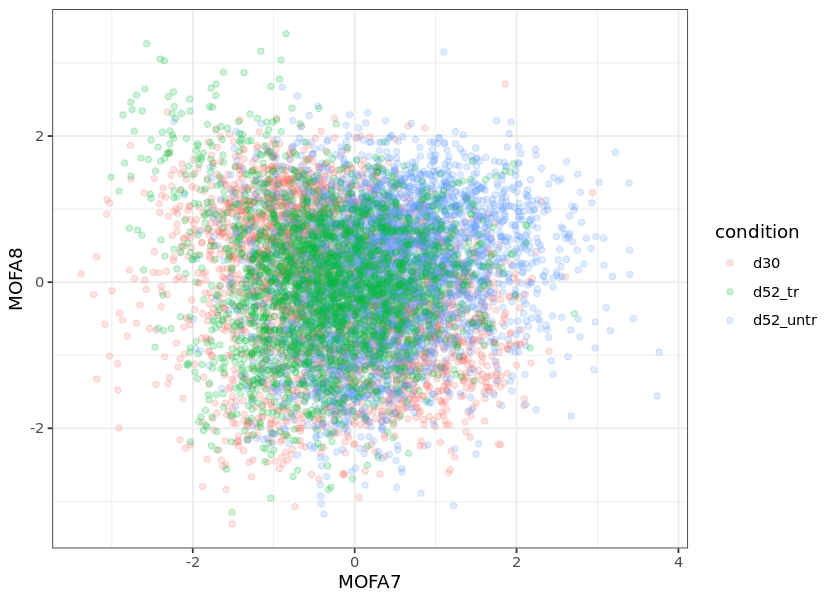

In [17]:
ggplot(df, aes(x = MOFA7, y = MOFA8, colour = condition)) + geom_point(alpha = 0.2) + theme_bw()

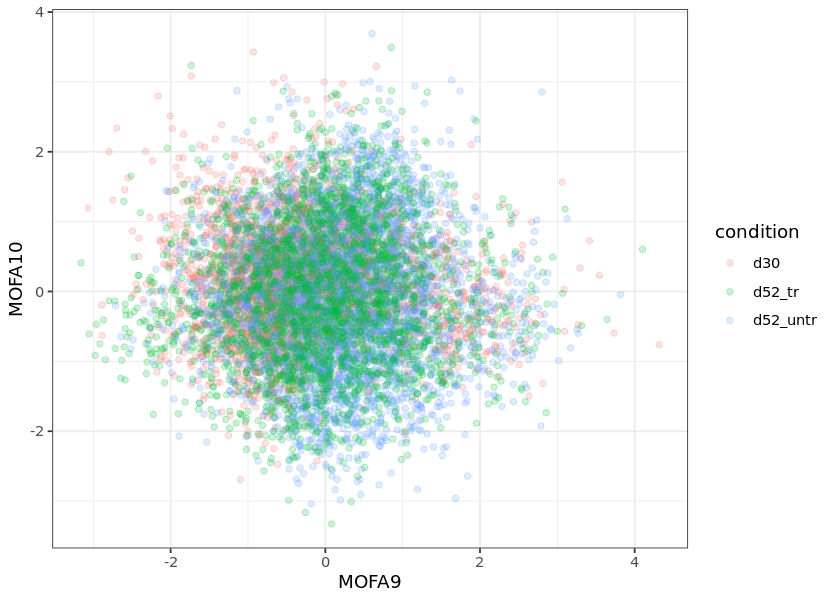

In [18]:
ggplot(df, aes(x = MOFA9, y = MOFA10, colour = condition)) + geom_point(alpha = 0.2) + theme_bw()

In [14]:
df$condition = c()

In [15]:
write.csv(df, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/MOFA_20.csv")

In [42]:
### tSNE
set.seed(0)
library(Rtsne)
tsne = Rtsne(df)

df_tsne = data.frame(tsne$Y)
colnames(df_tsne) = c("tSNE1","tSNE2")
df_tsne$condition = sce$condition

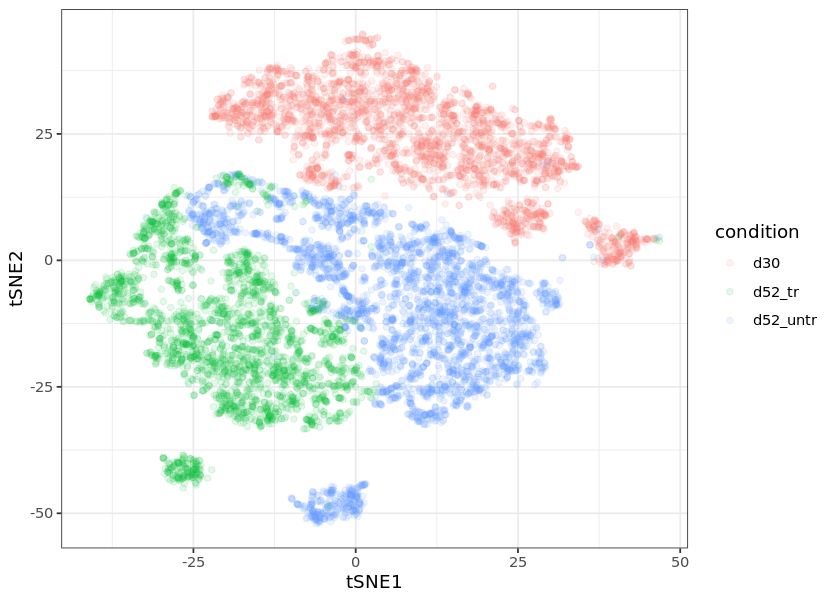

In [43]:
p = ggplot(df_tsne, aes(x = tSNE1, y = tSNE2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

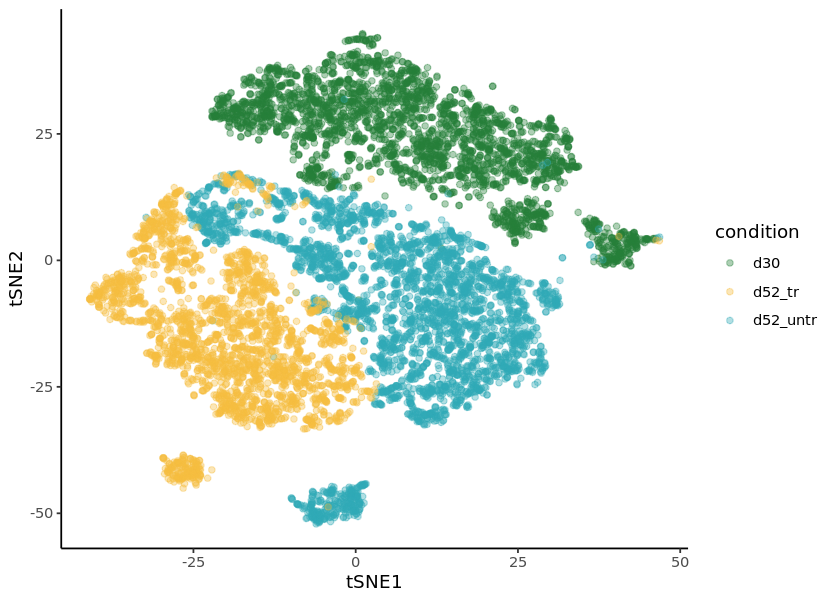

In [44]:
# change colours
# make theme_classic
p + theme_classic() + scale_color_canva(palette = "Cheerful brights") + geom_point(alpha = 0.3)

In [45]:
rownames(df_tsne) = rownames(df)

In [46]:
head(df_tsne)

,tSNE1,tSNE2,condition
HPSI0714i-iudw_1--DA--d30--0,-13.7566906,32.71191,d30
HPSI0714i-iudw_1--DA--d30--1,4.6202919,31.43719,d30
HPSI0714i-iudw_1--DA--d30--2,-0.2728905,38.26676,d30
HPSI0714i-iudw_1--DA--d30--3,-8.2737582,33.39863,d30
HPSI0714i-iudw_1--DA--d30--4,29.7120934,20.15199,d30
HPSI0714i-iudw_1--DA--d30--5,18.9223039,16.77345,d30


In [47]:
write.csv(df_tsne, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/mofa_tsne.csv")

In [41]:
umap = umap(df)
df_umap = data.frame(umap$layout)
colnames(df_umap) = c("UMAP1","UMAP2")
head(df_umap,2)

,UMAP1,UMAP2
HPSI0714i-iudw_1--DA--d30--0,-9.422561,-0.8857786
HPSI0714i-iudw_1--DA--d30--1,-8.134707,1.3875695


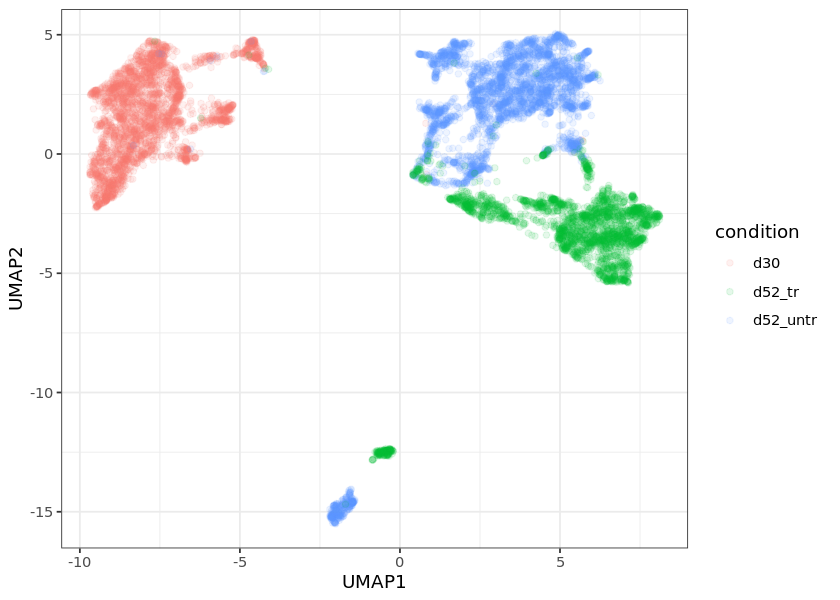

In [42]:
df_umap$condition = sce$condition
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p